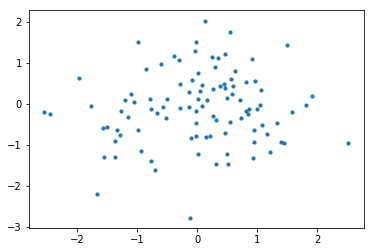

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from SimPEG.Utils import mkvc
xx = np.random.randn(100)
yy = np.random.randn(100)

plt.scatter(xx, yy, 10)


In [87]:
dy

array([], dtype=float64)

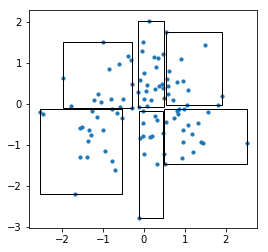

In [95]:
nRefine = 3

# Test each refinement level for maximum space coverage
nTx = 0
nTy = 0
for ii in range(nRefine+1):
    
    nTx += 1
    nTy += 1
    
    tilex = np.percentile(xx, np.arange(0, 100, 100/nTx))
    tiley = np.percentile(yy, np.arange(0, 100, 100/nTy))

    if ii > 0:
        dx = tilex[:-1] - tilex[1:]
        dy = tiley[:-1] - tiley[1:]

        if np.mean(dx) > np.mean(dy):
            nTx -= 1
        else:
            nTy -= 1
        

tilex = np.percentile(xx, np.arange(0, 100, 100/nTx))
tiley = np.percentile(yy, np.arange(0, 100, 100/nTy))
    
X1, Y1 = np.meshgrid(tilex, tiley)
X2, Y2 = np.meshgrid(np.r_[tilex[1:],xx.max()] , np.r_[tiley[1:],yy.max()])

# Plot data and tiles

X1, Y1, X2, Y2 = mkvc(X1), mkvc(Y1), mkvc(X2), mkvc(Y2)
binCount = []
tile = []
for ii in range(X1.shape[0]):

    mask = (
        (xx >= X1[ii]) * (xx <= X2[ii]) *
         (yy >= Y1[ii]) * (yy <= Y2[ii])
    ) == 1
    
    X1[ii], X2[ii] = xx[mask].min(), xx[mask].max()   
    Y1[ii], Y2[ii] = yy[mask].min(), yy[mask].max() 
    binCount+=[mask.sum()]

    
fig, ax1 = plt.figure(), plt.subplot()

plt.scatter(xx, yy, 10)

for ii in range(X1.shape[0]):
    
    
    ax1.add_patch(Rectangle((X1[ii], Y1[ii]),
                            X2[ii]-X1[ii],
                            Y2[ii]-Y1[ii],
                            facecolor='none', edgecolor='k'))
# ax1.set_xlim([X1.min()-20, X2.max()+20])
# ax1.set_ylim([Y1.min()-20, Y2.max()+20])
ax1.set_aspect('equal')
plt.show()


In [59]:
X1, X2

(array([-2.0801748 , -2.0801748 , -2.0801748 , -0.55970596, -0.55970596,
        -0.55970596, -0.0805174 , -0.0805174 , -0.0805174 ]),
 array([-0.55970596, -0.55970596, -0.55970596, -0.0805174 , -0.0805174 ,
        -0.0805174 ,  1.20107625,  1.20107625,  1.20107625]))

In [60]:
binCount

[3, 4, 3, 3, 3, 4, 4, 3, 3]

In [102]:
np.arange(3-1,-1,-1)

array([2, 1, 0])

In [103]:
nCpad = [1,2,0]
np.ones(nCpad)

array([], shape=(1, 2, 0), dtype=float64)

In [109]:
np.repeat(1 * 2**np.arange(len(nCpad)), nCpad)

array([1, 2, 2], dtype=int32)